## [Drawing Molecules (Jupyter)](https://www.rdkit.org/docs/Cookbook.html#drawing-molecules-jupyter)

### [Include an Atom Index](https://www.rdkit.org/docs/Cookbook.html#include-an-atom-index)

In [242]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [243]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

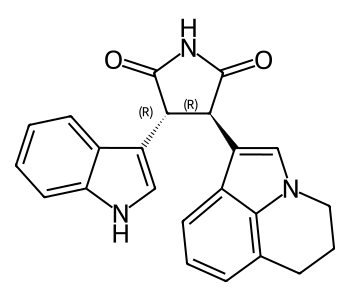

In [244]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

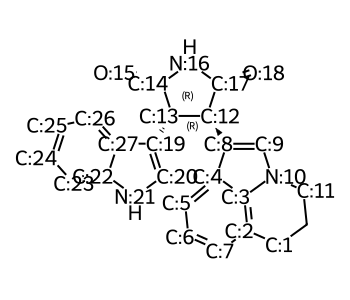

In [245]:
# With atom index
mol_with_atom_index(mol)

In [246]:
# from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300

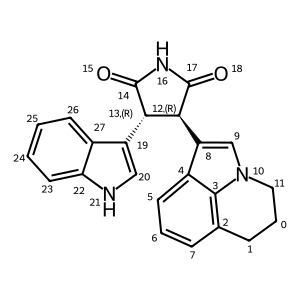

In [247]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
mol

In [248]:
IPythonConsole.drawOptions.addAtomIndices = False

### [Include a Calculation](https://www.rdkit.org/docs/Cookbook.html#include-a-calculation)

In [249]:
# from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

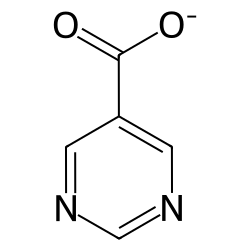

In [250]:
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
AllChem.ComputeGasteigerCharges(m)
m

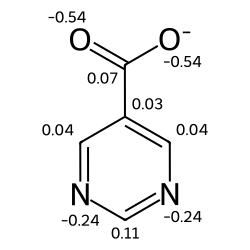

In [251]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote', lbl)
m2

### [Include Stereo Annotations](https://www.rdkit.org/docs/Cookbook.html#include-stereo-annotations)

In [252]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

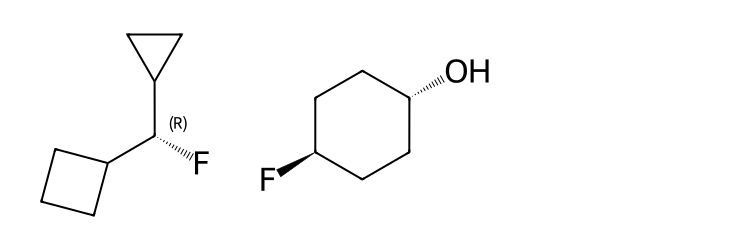

In [253]:
# Default Representation uses legacy FindMolChiralCenters() code
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

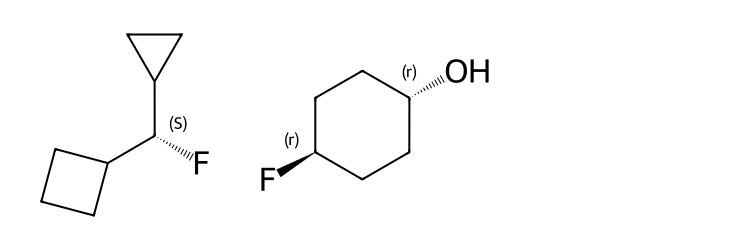

In [254]:
# new stereochemistry code with more accurate CIP labels, 2020.09 release
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m1)
rdCIPLabeler.AssignCIPLabels(m2)
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

### [Black and White Molecules](https://www.rdkit.org/docs/Cookbook.html#black-and-white-molecules)

In [255]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

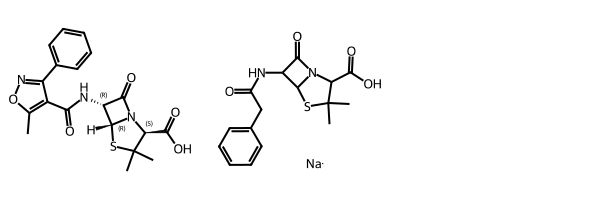

In [256]:
ms = [Chem.MolFromSmiles(x) for x in ('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12','CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')]
Draw.MolsToGridImage(ms)

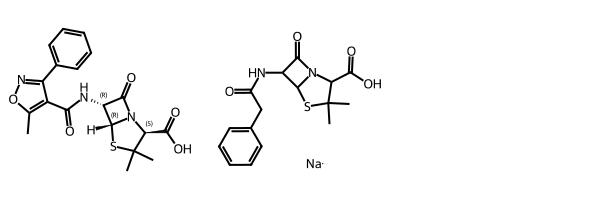

In [257]:
IPythonConsole.drawOptions.useBWAtomPalette()
Draw.MolsToGridImage(ms)

### [Highlight a Substructure in a Molecule](https://www.rdkit.org/docs/Cookbook.html#highlight-a-substructure-in-a-molecule)

In [258]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [259]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


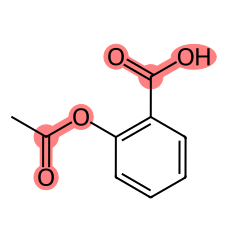

In [260]:
m

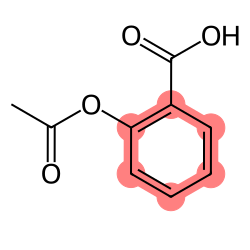

In [261]:
substructure2 = Chem.MolFromSmarts('cc')
m.GetSubstructMatches(substructure2)
m

Note that doing another .GetSubstructMatches() on a molecule removes the first one (highlighting matches)

### [Highlight Molecule Differences](https://www.rdkit.org/docs/Cookbook.html#highlight-molecule-differences)

In [262]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=10

In [263]:
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')

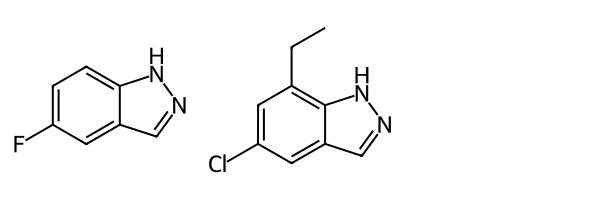

In [264]:
Draw.MolsToGridImage([mol1, mol2])

In [265]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1, mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    print(f"{target_atm2=}")
    return Draw.MolsToGridImage([mol1, mol2], highlightAtomLists=[target_atm1, target_atm2])

target_atm2=[0, 1, 10]


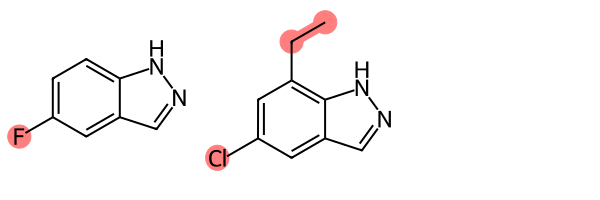

In [266]:
view_difference(mol1, mol2)

### [Without Implicit Hydrogens](http://rdkit.org/docs/Cookbook.html#without-implicit-hydrogens)

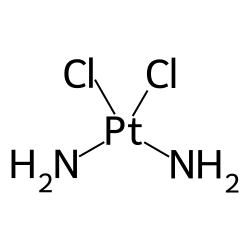

In [267]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
m = Chem.MolFromSmiles('[Pt](Cl)(Cl)(N)N')
m

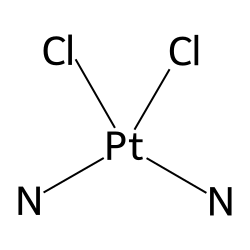

In [268]:
for atom in m.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol())
m

### [With Abbreviations](http://rdkit.org/docs/Cookbook.html#with-abbreviations)

In [269]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdAbbreviations

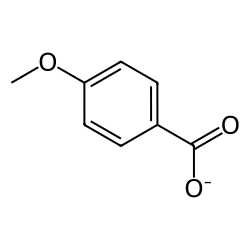

In [270]:
m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

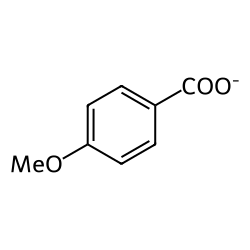

In [271]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs)
nm

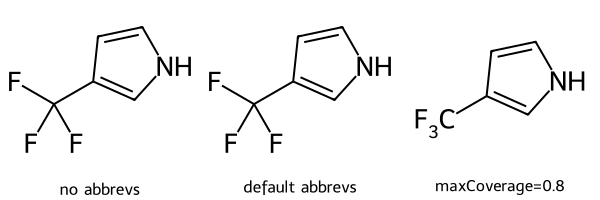

In [272]:
# Abbreviations that cover more than 40% of the molecule won't be applied by default
m = Chem.MolFromSmiles('c1c[nH]cc1C(F)(F)(F)')
nm1 = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs)
nm2 = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs, maxCoverage=0.8)
Draw.MolsToGridImage((m, nm1, nm2), legends=('no abbrevs', 'default abbrevs', 'maxCoverage=0.8'))

List of built-in abbreviations:

In [273]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
labels = ["Abbrev", "SMILES"]
line = '--------'

print(f"{labels[0]:<10} {labels[1]}")
print(f"{line:<10} {line}")
for a in abbrevs:
    print(f"{a.label:<10} {Chem.MolToSmiles(a.mol)}")

Abbrev     SMILES
--------   --------
CO2Et      *C(=O)OCC
COOEt      *C(=O)OCC
OiBu       *OCC(C)C
nDec       *CCCCCCCCCC
nNon       *CCCCCCCCC
nOct       *CCCCCCCC
nHept      *CCCCCCC
nHex       *CCCCCC
nPent      *CCCCC
iPent      *C(C)CCC
tBu        *C(C)(C)C
iBu        *C(C)CC
nBu        *CCCC
iPr        *C(C)C
nPr        *CCC
Et         *CC
NCF3       *NC(F)(F)F
CF3        *C(F)(F)F
CCl3       *C(Cl)(Cl)Cl
CN         *C#N
NC         *[N+]#[C-]
N(OH)CH3   *N(C)[OH]
NO2        *[N+](=O)[O-]
NO         *N=O
SO3H       *S(=O)(=O)[OH]
CO2H       *C(=O)[OH]
COOH       *C(=O)[OH]
OEt        *OCC
OAc        *OC(C)=O
NHAc       *NC(C)=O
Ac         *C(C)=O
CHO        *C=O
NMe        *NC
SMe        *SC
OMe        *OC
CO2-       *C(=O)[O-]
COO-       *C(=O)[O-]


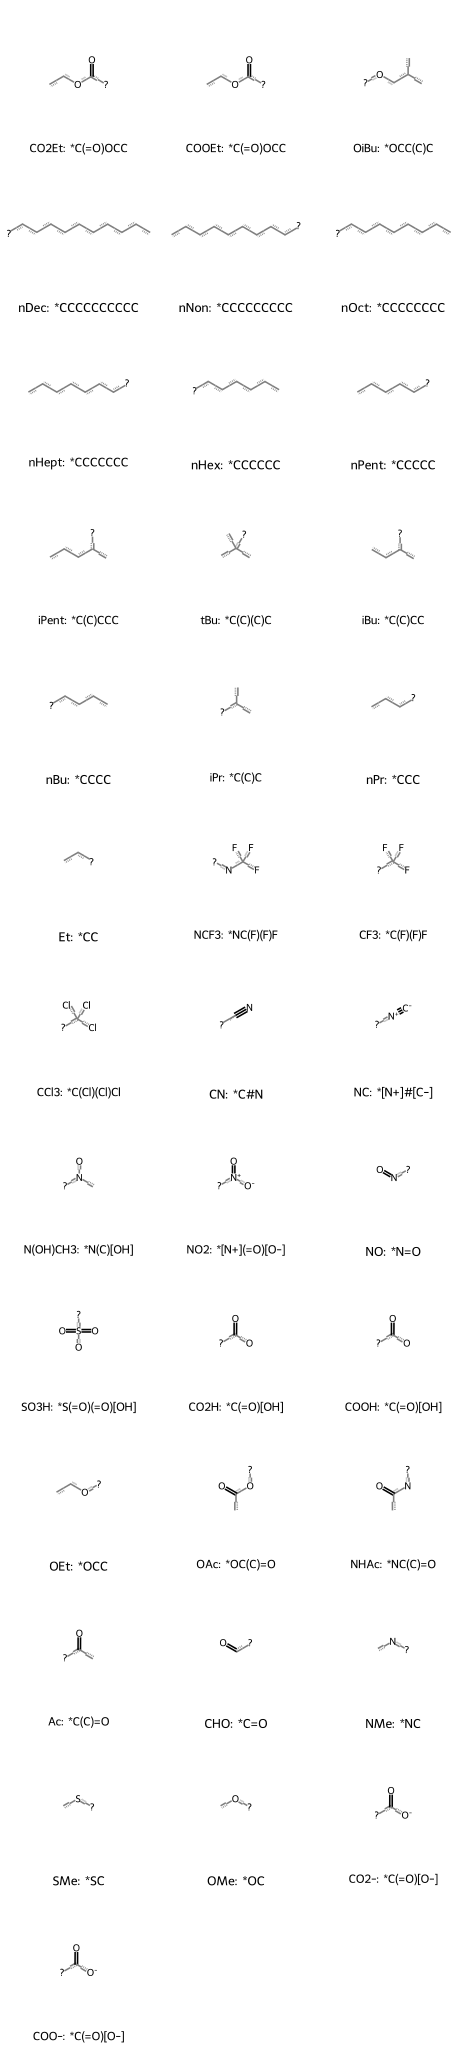

In [274]:
abbrevs_mols = [a.mol for a in abbrevs]
abbrevs_labels = [a.label for a in abbrevs]
abbrevs_smiles = [Chem.MolToSmiles(mol) for mol in abbrevs_mols]
legends = [label + ": " + smile for label, smile in zip(abbrevs_labels, abbrevs_smiles)]
Draw.MolsToGridImage(abbrevs_mols, legends=legends)

### [Using CoordGen Library](https://www.rdkit.org/docs/Cookbook.html#using-coordgen-library) to draw macrocycles well

In [275]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350, 300
from rdkit.Chem import Draw

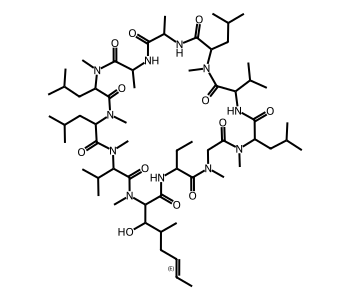

In [276]:
# default drawing
macro = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
macro

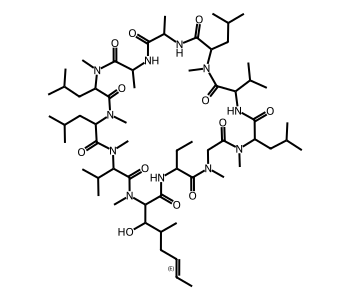

In [277]:
# with CoordGen
from rdkit.Chem import rdCoordGen
rdCoordGen.AddCoords(macro)
# for atom in macro.GetAtoms():
#     atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
macro

### [On a Plot](https://www.rdkit.org/docs/Cookbook.html#on-a-plot) (showing a molecule on a plot)

In [278]:
import matplotlib.pyplot as plt
import numpy as np

In [279]:
x = np.arange(0,180,1)
y = np.sin(x)

In [280]:
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)

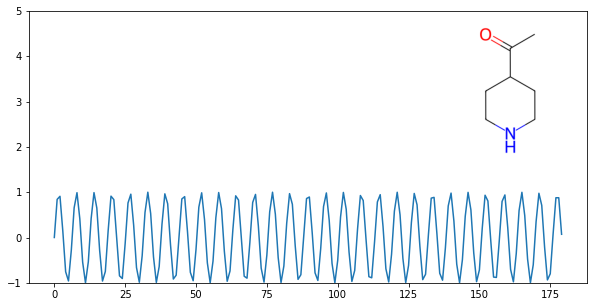

In [281]:
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.ylim(-1, 5)
ax = plt.axes([0.6, 0.47, 0.38, 0.38], frameon=True)
ax.imshow(im)
ax.axis('off')
plt.show()

## [Bonds and Bonding](https://www.rdkit.org/docs/Cookbook.html#bonds-and-bonding)

### Hybridization Type and Count

In [282]:
from rdkit import Chem
m = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
for atom in m.GetAtoms():
    print(atom.GetIdx(), atom.GetHybridization())

0 SP3
1 SP2
2 SP2
3 SP2
4 SP2
5 SP2
6 SP2
7 SP2
8 SP2
9 SP2
10 SP2
11 SP2
12 SP3
13 SP3


In [283]:
# Count hybridization type
print(sum((atom.GetHybridization() == Chem.HybridizationType.SP3) for atom in m.GetAtoms()))

3


In [284]:
Chem.rdchem.HybridizationType

rdkit.Chem.rdchem.HybridizationType

In [285]:
Chem.rdchem.HybridizationType.values

{0: rdkit.Chem.rdchem.HybridizationType.UNSPECIFIED,
 1: rdkit.Chem.rdchem.HybridizationType.S,
 2: rdkit.Chem.rdchem.HybridizationType.SP,
 3: rdkit.Chem.rdchem.HybridizationType.SP2,
 4: rdkit.Chem.rdchem.HybridizationType.SP3,
 5: rdkit.Chem.rdchem.HybridizationType.SP2D,
 6: rdkit.Chem.rdchem.HybridizationType.SP3D,
 7: rdkit.Chem.rdchem.HybridizationType.SP3D2,
 8: rdkit.Chem.rdchem.HybridizationType.OTHER}

In [286]:
Chem.rdchem.HybridizationType.names

{'UNSPECIFIED': rdkit.Chem.rdchem.HybridizationType.UNSPECIFIED,
 'S': rdkit.Chem.rdchem.HybridizationType.S,
 'SP': rdkit.Chem.rdchem.HybridizationType.SP,
 'SP2': rdkit.Chem.rdchem.HybridizationType.SP2,
 'SP3': rdkit.Chem.rdchem.HybridizationType.SP3,
 'SP2D': rdkit.Chem.rdchem.HybridizationType.SP2D,
 'SP3D': rdkit.Chem.rdchem.HybridizationType.SP3D,
 'SP3D2': rdkit.Chem.rdchem.HybridizationType.SP3D2,
 'OTHER': rdkit.Chem.rdchem.HybridizationType.OTHER}

In [287]:
# Print the count for each hybridization type
for hybrid_type in Chem.rdchem.HybridizationType.names:
    # Get the object for each hybridization type, e.g. rdkit.Chem.rdchem.HybridizationType.S
    member = Chem.rdchem.HybridizationType.names[hybrid_type]
    print(f"{member}: {sum((atom.GetHybridization() == member) for atom in m.GetAtoms())}")

# Could print out only hybridization types with non-zero counts
# Could create a dictionary of hybridization_type: count pairs for programmatic interrogation

UNSPECIFIED: 0
S: 0
SP: 0
SP2: 11
SP3: 3
SP2D: 0
SP3D: 0
SP3D2: 0
OTHER: 0


## [Rings, Aromaticity, and Kekulization](https://www.rdkit.org/docs/Cookbook.html#rings-aromaticity-and-kekulization)

### [Count Ring Systems](https://www.rdkit.org/docs/Cookbook.html#count-ring-systems)

In [288]:
def GetRingSystems(mol, includeSpiro = False):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return systems

In [289]:
mol = Chem.MolFromSmiles('CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3')
print(GetRingSystems(mol))

[{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12}, {14, 15, 16, 17, 18, 19}]


## [Stereochemistry](https://www.rdkit.org/docs/Cookbook.html#stereochemistry)

### [Identifying Stereochemistry](https://www.rdkit.org/docs/Cookbook.html#identifying-stereochemistry)

In [290]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True

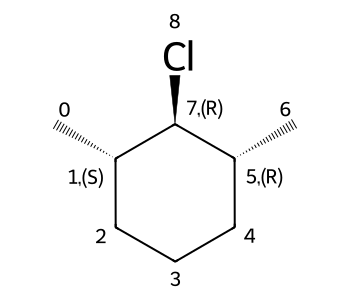

In [291]:
m = Chem.MolFromSmiles("C[C@H]1CCC[C@@H](C)[C@@H]1Cl")
m

In [292]:
print(Chem.FindMolChiralCenters(m, force=True, includeUnassigned=True, useLegacyImplementation=False))

[(1, 'S'), (5, 'R'), (7, 'r')]


In [293]:
si = Chem.FindPotentialStereo(m)
for element in si:
    print(f'Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor}, Permutation: {element.permutation}')
    controlling_atoms = []
    ca = element.controllingAtoms
    if not ca is None:
        for atom in element.controllingAtoms:
            controlling_atoms.append(atom)
        if len(controlling_atoms) > 0:
            print(f'  Controlling atoms: {controlling_atoms}')

Type: Atom_Tetrahedral, Which: 1, Specified: Specified, Descriptor: Tet_CW, Permutation: 0
  Controlling atoms: [0, 2, 7]
Type: Atom_Tetrahedral, Which: 5, Specified: Specified, Descriptor: Tet_CW, Permutation: 0
  Controlling atoms: [4, 6, 7]
Type: Atom_Tetrahedral, Which: 7, Specified: Specified, Descriptor: Tet_CCW, Permutation: 0
  Controlling atoms: [1, 5, 8]


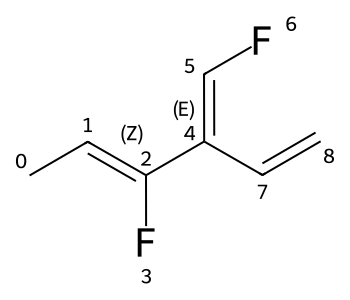

In [294]:
mol_double_bonds = Chem.MolFromSmiles("C\C=C(/F)\C(=C\F)\C=C")
mol_double_bonds

In [295]:
for b in mol.GetBonds():
    print(b.GetBeginAtomIdx(),b.GetEndAtomIdx(),
          b.GetBondType(),b.GetStereo())

0 1 SINGLE STEREONONE
1 2 SINGLE STEREONONE
2 3 DOUBLE STEREONONE
2 4 SINGLE STEREONONE
4 5 SINGLE STEREONONE
5 6 DOUBLE STEREONONE
6 7 SINGLE STEREONONE
7 8 AROMATIC STEREONONE
8 9 AROMATIC STEREONONE
9 10 AROMATIC STEREONONE
10 11 AROMATIC STEREONONE
11 12 AROMATIC STEREONONE
11 13 SINGLE STEREONONE
6 14 SINGLE STEREONONE
14 15 AROMATIC STEREONONE
15 16 AROMATIC STEREONONE
16 17 AROMATIC STEREONONE
17 18 AROMATIC STEREONONE
18 19 AROMATIC STEREONONE
8 1 SINGLE STEREONONE
12 7 AROMATIC STEREONONE
19 14 AROMATIC STEREONONE


In [296]:
si = Chem.FindPotentialStereo(mol_double_bonds)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor}')

  Type: Bond_Double, Which: 1, Specified: Specified, Descriptor: Bond_Cis
  Type: Bond_Double, Which: 4, Specified: Specified, Descriptor: Bond_Trans


## [Manipulating Molecules](https://www.rdkit.org/docs/Cookbook.html#manipulating-molecules)

### [Create Fragments](https://www.rdkit.org/docs/Cookbook.html#create-fragments)

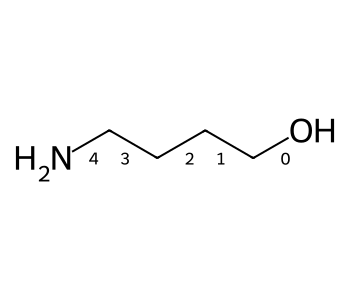

In [297]:
IPythonConsole.drawOptions.addAtomIndices = False

mol = Chem.MolFromSmiles("O-C-C-C-C-N")
mol1 = Chem.Mol(mol)
mol2 = Chem.Mol(mol)

for bnd in mol1.GetBonds():
    mol1.GetBondWithIdx(bnd.GetIdx()).SetProp('bondNote', str(bnd.GetIdx()))

mol1

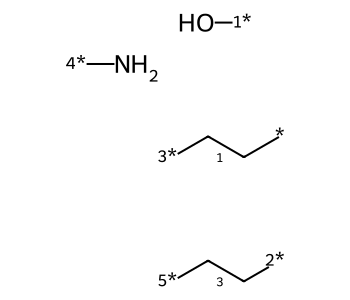

In [298]:
mol1_f = Chem.FragmentOnBonds(mol1, (0, 2, 4))
mol1_f

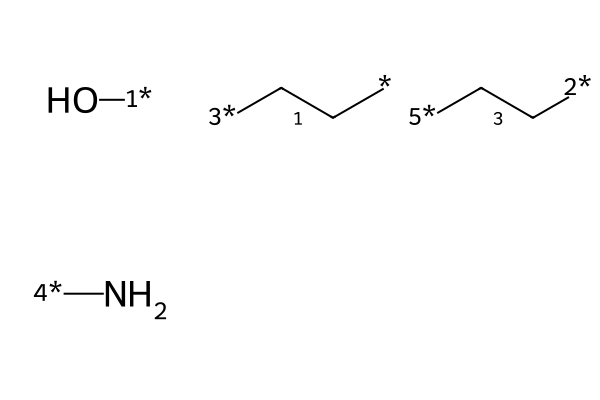

In [299]:
Draw.MolsToGridImage(Chem.GetMolFrags(mol1_f, asMols=True))

### [Sidechain-Core Enumeration](https://www.rdkit.org/docs/Cookbook.html#sidechain-core-enumeration)

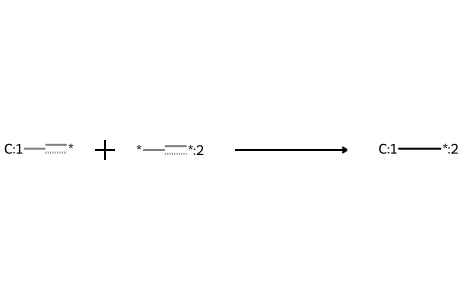

In [300]:
IPythonConsole.drawOptions.addAtomIndices = False
r = '[c:1][#0].[#0][*:2]'
r_mol = Chem.MolFromSmarts(r)

p = '[c:1]-[*:2]'
p_mol = Chem.MolFromSmarts(p)

# rxn = AllChem.ReactionFromSmarts('[c:1][#0].[#0][*:2]>>[c:1]-[*:2]')
rxn = AllChem.ReactionFromSmarts(r + '>>' + p)
rxn

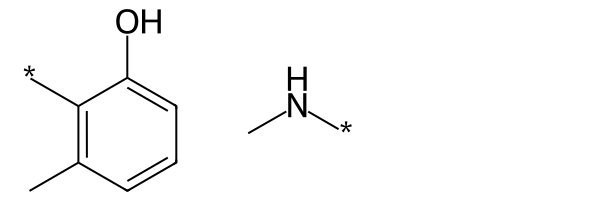

In [301]:
reacts = Chem.MolFromSmiles('*c1c(C)cccc1(O)'),Chem.MolFromSmiles('CN*')
Draw.MolsToGridImage([react for react in reacts])

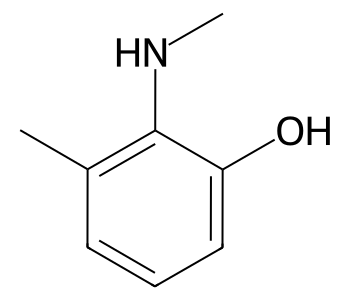

In [302]:
products = rxn.RunReactants(reacts)
products[0][0]

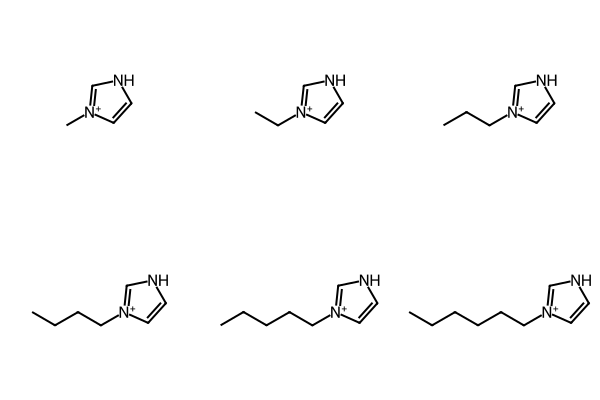

In [303]:
# Here is an example in a loop for an imidazolium core with alkyl chains
core = Chem.MolFromSmiles('*[n+]1cc[nH]c1')
chains = ['C','CC','CCC','CCCC','CCCCC','CCCCCC']
chainMols = [Chem.MolFromSmiles(chain) for chain in chains]

product_smi = []
for chainMol in chainMols:
    product_mol = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),chainMol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])

*** Skipping sections for now

## [Reactions](https://www.rdkit.org/docs/Cookbook.html#reactions)

### [Reversing Reactions](https://www.rdkit.org/docs/Cookbook.html#reversing-reactions)

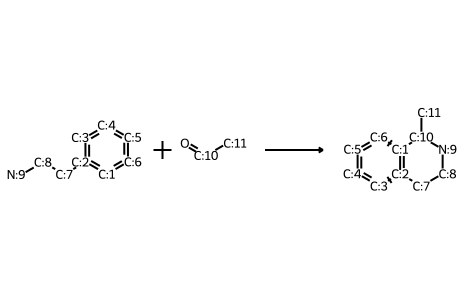

In [304]:
# Pictet-Spengler rxn
rxn_fwd = AllChem.ReactionFromSmarts('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1.[#6:11]-[CH1;R0:10]=[OD1]>>[c:1]12:[c:2](-[CH2:7]-[CH2:8]-[NH1:9]-[C:10]-2(-[#6:11])):[c:3]:[c:4]:[c:5]:[c:6]:1')
rxn_fwd

In [305]:
# Show the reactant templates for the forward reaction
rxn_fwd_reactant_templates = []
for reactant_index in range(rxn_fwd.GetNumReactantTemplates()):
    rxn_fwd_reactant_templates.append(rxn_fwd.GetReactantTemplate(reactant_index))
Draw.MolsToGridImage(rxn_fwd_reactant_templates)

[22:27:05] 

****
Pre-condition Violation
getExplicitValence() called without call to calcExplicitValence()
Violation occurred on line 308 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-10.9-x86_64-cpython-310/rdkit/Code/GraphMol/Atom.cpp
Failed Expression: d_explicitValence > -1
****



RuntimeError: Pre-condition Violation
	getExplicitValence() called without call to calcExplicitValence()
	Violation occurred on line 308 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_explicitValence > -1
	RDKIT: 2022.09.1
	BOOST: 1_78


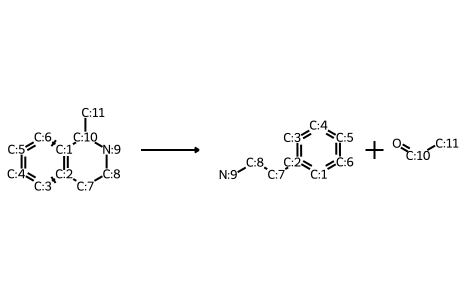

In [ ]:
rxn_rev = AllChem.ChemicalReaction()
for i in range(rxn_fwd.GetNumReactantTemplates()):
    rxn_rev.AddProductTemplate(rxn_fwd.GetReactantTemplate(i))
for i in range(rxn_fwd.GetNumProductTemplates()):
    rxn_rev.AddReactantTemplate(rxn_fwd.GetProductTemplate(i))
rxn_rev.Initialize()
rxn_rev

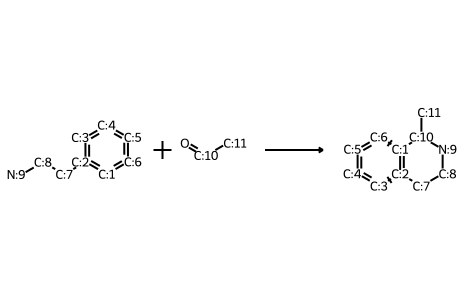

In [ ]:
rxn_fwd

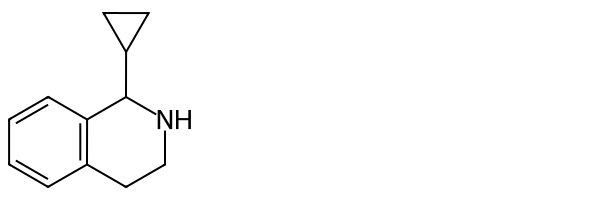

In [ ]:
reacts = [Chem.MolFromSmiles(m) for m in ('NCCc1ccccc1','C1CC1C(=O)')]
ps = rxn_fwd.RunReactants(reacts)
ps0 = ps[0]
for p in ps0:
    Chem.SanitizeMol(p)
Draw.MolsToGridImage(ps0)

In [ ]:
reacts = ps0
rps = rxn_rev.RunReactants(reacts)
rps0 = rps[0]
for rp in rps0:
    Chem.SanitizeMol(rp)
Draw.MolsToGridImage(rps0)

[22:25:52] reaction has no reactants
[22:25:52] reaction has no products
[22:25:52] initialization failed


ValueError: ChemicalParserException: initMatchers() must be called before runReactants()

### Reaction Fingerprints and Similarity

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import DataStructs

In [ ]:
# construct the chemical reactions
rxn1 = rdChemReactions.ReactionFromSmarts('CCCO>>CCC=O')
rxn2 = rdChemReactions.ReactionFromSmarts('CC(O)C>>CC(=O)C')
rxn3 = rdChemReactions.ReactionFromSmarts('NCCO>>NCC=O')

# construct difference fingerprint (subtracts reactant fingerprint from product)
fp1 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn1)
fp2 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn2)
fp3 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn3)

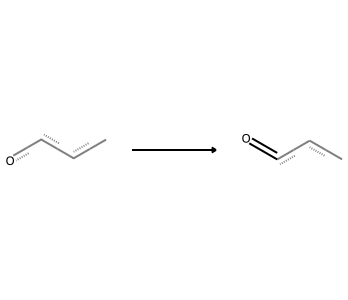

In [ ]:
rxn1

In [ ]:
fp1

In [ ]:
print(DataStructs.TanimotoSimilarity(fp1,fp2))

0.0


In [ ]:
import itertools
fps = (fp1, fp2, fp3)
for subset in itertools.combinations(fps, 2):
    s = DataStructs.TanimotoSimilarity(subset[0], subset[1])
    print(s)

0.0
0.42857142857142855
0.0


In [ ]:
fps_dict = {rxn1: fp1, rxn2: fp2, rxn3: fp3}
for subset in itertools.combinations(fps_dict.items(), 2):
    # print(subset)
    s = DataStructs.TanimotoSimilarity(subset[0][1], subset[1][1])
    print(f"{subset[0][0]} {subset[1][0]} = {s}")
    # print(subset[0][0])
    Draw.ReactionToImage(subset[0][0])

<rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fa138ede490> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fa138ede6c0> = 0.0
<rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fa138ede490> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fa138edf6f0> = 0.42857142857142855
<rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fa138ede6c0> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fa138edf6f0> = 0.0


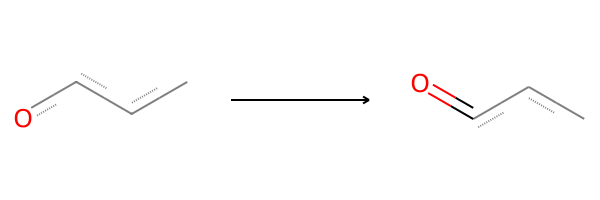

In [ ]:
Draw.ReactionToImage(rxn1)